In [ ]:
import os
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import matplotlib.pyplot as plt
import torch.nn.functional as F


from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.utils import save_image

In [ ]:
# constants
NUM_EPOCHS = 50
LEARNING_RATE = 1e-3
BATCH_SIZE = 128
 
# image transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [ ]:
trainset=datasets.FashionMNIST(root="./data",train=True,download=True,transform=transform)

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [ ]:
testset=datasets.FashionMNIST(root="./data",train=False,download=True,transform=transform)

trainloader=DataLoader(trainset,batch_size=BATCH_SIZE,shuffle=True)


testloader=DataLoader(trainset,batch_size=BATCH_SIZE,shuffle=True)

In [ ]:
def get_device():
    if torch.cuda.is_available():
        device = 'cuda:0'
    else:
        device = 'cpu'
    return device
 
def make_dir():
    image_dir = 'FashionMNIST_Images'
    if not os.path.exists(image_dir):
        os.makedirs(image_dir)
 
def save_decoded_image(img, epoch):
    img = img.view(img.size(0), 1, 28, 28)
    save_image(img, './FashionMNIST_Images/linear_ae_image{}.png'.format(epoch))

In [ ]:
class Autoencoder(nn.Module):
  def __init__(self):
    super(Autoencoder,self).__init__()

    #Encoder
    
    self.enc1=nn.Linear(in_features=784,out_features=256)

    self.enc2=nn.Linear(in_features=256,out_features=128)

    self.enc3=nn.Linear(in_features=128,out_features=64)
    
    self.enc4=nn.Linear(in_features=64,out_features=32)

    self.enc5=nn.Linear(in_features=32,out_features=16)

    #Decoder

    self.dec1 = nn.Linear(in_features=16, out_features=32)
      
    self.dec2 = nn.Linear(in_features=32, out_features=64)
      
    self.dec3 = nn.Linear(in_features=64, out_features=128)
      
    self.dec4 = nn.Linear(in_features=128, out_features=256)
      
    self.dec5 = nn.Linear(in_features=256, out_features=784)

  def forward(self,x):
        x = F.relu(self.enc1(x))
        x = F.relu(self.enc2(x))
        x = F.relu(self.enc3(x))
        x = F.relu(self.enc4(x))
        x = F.relu(self.enc5(x))
 
        x = F.relu(self.dec1(x))
        x = F.relu(self.dec2(x))
        x = F.relu(self.dec3(x))
        x = F.relu(self.dec4(x))
        x = F.relu(self.dec5(x))
        return x

net=Autoencoder()


In [ ]:
print(net)

Autoencoder(
  (enc1): Linear(in_features=784, out_features=256, bias=True)
  (enc2): Linear(in_features=256, out_features=128, bias=True)
  (enc3): Linear(in_features=128, out_features=64, bias=True)
  (enc4): Linear(in_features=64, out_features=32, bias=True)
  (enc5): Linear(in_features=32, out_features=16, bias=True)
  (dec1): Linear(in_features=16, out_features=32, bias=True)
  (dec2): Linear(in_features=32, out_features=64, bias=True)
  (dec3): Linear(in_features=64, out_features=128, bias=True)
  (dec4): Linear(in_features=128, out_features=256, bias=True)
  (dec5): Linear(in_features=256, out_features=784, bias=True)
)


In [ ]:


criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=LEARNING_RATE)

	
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=LEARNING_RATE)

In [ ]:
def train(net, trainloader, NUM_EPOCHS):
    train_loss = []
    for epoch in range(NUM_EPOCHS):
        running_loss = 0.0
        for data in trainloader:
            img, _ = data
            img = img.to(device)
            img = img.view(img.size(0), -1)
            optimizer.zero_grad()
            outputs = net(img)
            loss = criterion(outputs, img)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        loss = running_loss / len(trainloader)
        train_loss.append(loss)
        print('Epoch {} of {}, Train Loss: {:.3f}'.format(
            epoch+1, NUM_EPOCHS, loss))
 
        if epoch % 5 == 0:
            save_decoded_image(outputs.cpu().data, epoch)
 
    return train_loss
 
def test_image_reconstruction(net, testloader):
     for batch in testloader:
        img, _ = batch
        img = img.to(device)
        img = img.view(img.size(0), -1)
        outputs = net(img)
        outputs = outputs.view(outputs.size(0), 1, 28, 28).cpu().data
        save_image(outputs, 'fashionmnist_reconstruction.png')
        break

cuda:0
Epoch 1 of 50, Train Loss: 0.650
Epoch 2 of 50, Train Loss: 0.632
Epoch 3 of 50, Train Loss: 0.628
Epoch 4 of 50, Train Loss: 0.626
Epoch 5 of 50, Train Loss: 0.623
Epoch 6 of 50, Train Loss: 0.621
Epoch 7 of 50, Train Loss: 0.620
Epoch 8 of 50, Train Loss: 0.619
Epoch 9 of 50, Train Loss: 0.619
Epoch 10 of 50, Train Loss: 0.618
Epoch 11 of 50, Train Loss: 0.618
Epoch 12 of 50, Train Loss: 0.617
Epoch 13 of 50, Train Loss: 0.617
Epoch 14 of 50, Train Loss: 0.616
Epoch 15 of 50, Train Loss: 0.616
Epoch 16 of 50, Train Loss: 0.615
Epoch 17 of 50, Train Loss: 0.615
Epoch 18 of 50, Train Loss: 0.614
Epoch 19 of 50, Train Loss: 0.614
Epoch 20 of 50, Train Loss: 0.614
Epoch 21 of 50, Train Loss: 0.614
Epoch 22 of 50, Train Loss: 0.613
Epoch 23 of 50, Train Loss: 0.613
Epoch 24 of 50, Train Loss: 0.613
Epoch 25 of 50, Train Loss: 0.613
Epoch 26 of 50, Train Loss: 0.612
Epoch 27 of 50, Train Loss: 0.612
Epoch 28 of 50, Train Loss: 0.612
Epoch 29 of 50, Train Loss: 0.612
Epoch 30 of 50, 

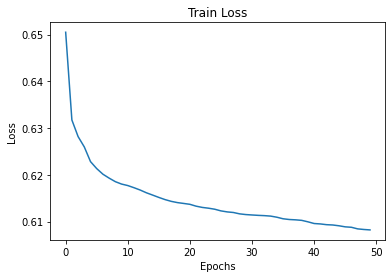

In [ ]:
device = get_device()
print(device)
# load the neural network onto the device
net.to(device)
 
make_dir()
 
# train the network
train_loss = train(net, trainloader, NUM_EPOCHS)
plt.figure()
plt.plot(train_loss)
plt.title('Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.savefig('deep_ae_fashionmnist_loss.png')
 
# test the network
test_image_reconstruction(net, testloader)

In [12]:

!ls




data			       FashionMNIST_Images		sample_data
deep_ae_fashionmnist_loss.png  fashionmnist_reconstruction.png


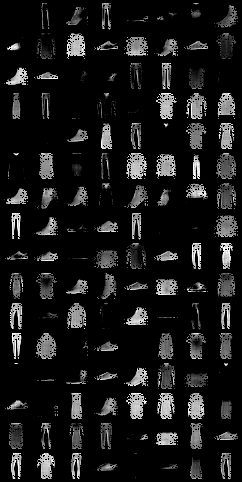

In [13]:
from IPython.display import Image
Image('fashionmnist_reconstruction.png')